In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Part-1 Data preprocessing
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values
                           
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

#reshaping
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [3]:
#Part-2 Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Initializing the RNN
regressor = Sequential()

# Adding LSTM and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Add output Layer
regressor.add(Dense(1))

#Compiling the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#fitting the RNN to training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0451
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013


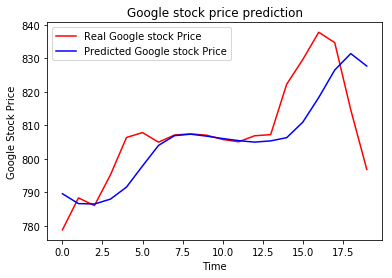

In [4]:
#Part-3 Making Predictions
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']) ,axis = 0)
first_index = len(dataset_total) - len(dataset_test) #index of first financial day in test set
inputs = dataset_total[first_index - 60 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()